In [80]:
import datetime
import collections
import folium

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from pyspark.sql.functions import *
from pyspark.sql.types import *

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from tslearn.clustering import TimeSeriesKMeans

In [81]:
#서울 데이터
import pymysql
conn = pymysql.connect(host='127.0.0.1', port=3306, user='root', password='10042356', use_unicode=True, db="bigcontest", 
                       charset='utf8', autocommit=True, cursorclass=pymysql.cursors.DictCursor)
cursor = conn.cursor()
cursor.execute("""
select 
    c.STD_YM,
    c.HDONG_CD,
    c.HDONG_NM,
    SUM(c.DFLOW) as MONTH_FLOW
from
    (select
        STD_YM,
        STD_YMD,
        HDONG_CD,
        HDONG_NM,
        (TMST_00 + TMST_01 + TMST_02 + TMST_03 + TMST_04 + TMST_05 + TMST_06 + TMST_07 + TMST_08 + TMST_09 + TMST_10 + TMST_11 + 
        TMST_12 + TMST_13 + TMST_14 + TMST_15 + TMST_16 + TMST_17 + TMST_18 + TMST_19 + TMST_20 + TMST_21 + TMST_22 + TMST_23) as DFLOW
    from
        flowtime
    where
        HDONG_CD LIKE '11%') c
group by
    c.STD_YM,
    c.HDONG_NM
""")
flowdata_s = cursor.fetchall()

In [82]:
import pandas as pd
flowdata_s = pd.DataFrame(flowdata_s)
#flowdata_s['STD_YMD'] = pd.to_datetime(flowdata_s['STD_YMD'])

In [83]:
seoul = flowdata_s.pivot("HDONG_NM", "STD_YM", "MONTH_FLOW")
seoul

STD_YM,201902,201903,201904,201905,202002,202003,202004,202005
HDONG_NM,,,,,,,,
공릉1동,4965961.01,5907520.78,5182081.98,5495517.58,4226213.57,4267738.07,4498066.00,4943156.32
공릉2동,4941726.10,6765393.76,5956036.50,6362087.26,3954884.76,4162652.49,4518747.05,4963312.08
광희동,6303595.62,7928739.13,6538534.45,7196462.39,5000792.02,4355935.47,4510623.33,4845804.53
다산동,1547639.73,1887139.53,2356719.05,2435285.26,1860427.01,1686735.31,1587848.85,1665744.70
동화동,536951.64,667263.57,788815.09,866152.98,786002.81,621276.93,501027.57,540486.19
명동,9373870.02,11269164.38,9158613.64,9342119.01,6088890.15,5021129.82,5528470.98,6108631.11
상계10동,1272476.03,1426032.17,1192878.17,1225937.85,916083.12,889529.52,961147.61,1032872.52
상계1동,3353310.87,4028915.17,3489412.77,3865485.93,2790574.42,2908710.99,3144807.64,3412408.02
상계2동,2493101.28,2943992.85,2722504.45,2948043.93,2307955.89,2091359.61,2292294.33,2576005.65


In [84]:
df_npy1 = list(np.array(seoul.index.tolist()))
#print(df_npy1)
df_npy2 = list(np.array(seoul).tolist()) # spark dataframe을 numpy로 변환합니다.
#print(df_npy2)

df_npy = [[x,y] for x, y in zip(df_npy1, df_npy2)]
#print(df_npy)

name_npy = np.array(df_npy1)   #행정동의 이름을 저장하는 데이터 변수입니다.
feature_npy = np.array(df_npy2) #행정동 시계열 데이터를 저장하는 데이터 변수입니다.

def normalization_axis(feature): #시계열 데이터의 효율적인 클러스터링을 위해 normalization을 진행합니다.
    sum_npy = np.array([x/np.sum(x) for x in feature])
    return sum_npy

feature_norm_npy = normalization_axis(feature_npy)
feature_npy = np.array([np.array(x) for x in df_npy2])

In [85]:
route_total = str(feature_norm_npy[~np.isnan(feature_norm_npy).any(axis=1)].shape[0])
print("서울시 행정동 수 : "+str(feature_norm_npy.shape[0]))
print("결측값을 제거한 서울시 행정동수 : "+route_total)
feature_norm = feature_norm_npy[~np.isnan(feature_norm_npy).any(axis=1)]
feature = feature_npy[~np.isnan(feature_norm_npy).any(axis=1)]
name = name_npy[~np.isnan(feature_norm_npy).any(axis=1)]

서울시 행정동 수 : 34
결측값을 제거한 서울시 행정동수 : 34


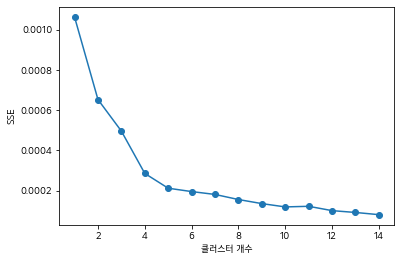

In [86]:
sse = []
for i in range(1,15):
    km = TimeSeriesKMeans(n_clusters=i, metric='euclidean', max_iter=150, random_state=144).fit(feature_norm)
    sse.append(km.inertia_)

plt.plot(range(1,15), sse, marker='o')
plt.xlabel('클러스터 개수')
plt.ylabel('SSE')
plt.show()

In [87]:
n_cluster = 4  #튜닝 작업을 거치며 4개로 결정했습니다.
km = TimeSeriesKMeans(n_clusters=n_cluster, metric="euclidean", max_iter=150).fit(feature_norm) 
# normalization 시계열 데이터를 활용해 euclidean 기반 클러스터링을 진행합니다.
rlt_tsm = km.predict(feature_norm)

C:\ProgramData\Anaconda3\lib\site-packages\tslearn\utils.py:91: UserWarning: 2-Dimensional data passed. Assuming these are 34 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))


In [88]:
# 클러스터별 분포도를 시각화하기 위해 전처리 작업입니다.
labels = []
sizes = []
for i in range(n_cluster):
    labels.append("cluster_"+str(i))
    sizes.append(collections.Counter(rlt_tsm)[i])

Text(0.5, 1.2, 'Cluster Distribution (number of route:34)')

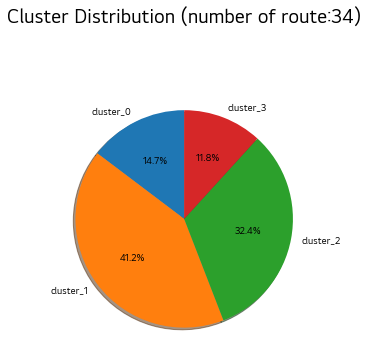

In [89]:
plt.figure(figsize=(10,5))
plt.pie(sizes,labels=labels,shadow=True,startangle=90,autopct='%1.1f%%')
plt.title("Cluster Distribution (number of route:"+route_total+")",position=(0.5,1.2),fontsize=20)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """


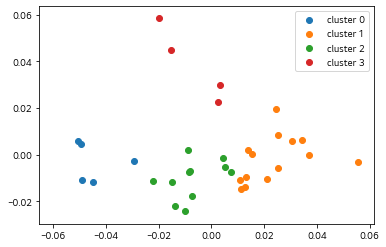

In [90]:
pca = PCA(n_components=2)  # pca를 진행해 클러스터가 얼마나 잘됐는지 검토합니다.
rlt_pca = pca.fit_transform(feature_norm_npy[~np.isnan(feature_norm_npy).any(axis=1)])
for i in range(n_cluster):
    label_name = "cluster " +str(i)
    plt.scatter(rlt_pca[[rlt_tsm==i]][:,0],rlt_pca[[rlt_tsm==i]][:,1],label=label_name)
plt.legend()

In [91]:
rlt_pca_df = pd.DataFrame(data=rlt_pca)
rlt_pca_df['name'] = name
rlt_pca_df['cluster'] = rlt_tsm

In [92]:
rlt_pca_df

,0,1,name,cluster
0,-0.007989,-0.006904,공릉1동,2
1,0.013687,0.001855,공릉2동,1
2,0.030447,0.005682,광희동,1
3,-0.015326,0.044802,다산동,3
4,-0.019995,0.058643,동화동,3
5,0.055445,-0.003349,명동,1
6,0.012834,-0.013729,상계10동,1
7,-0.008373,-0.007438,상계1동,2
8,-0.009020,0.001803,상계2동,2
9,-0.049105,-0.010763,상계3.4동,0


In [93]:
def show_cluster_dist(num_cluster,num_sample=50):
    from matplotlib import font_manager,rc
    font_path = "c:/Windows/Fonts/LG_Smart_UI-Regular.TTF"
    font_name = font_manager.FontProperties(fname=font_path).get_name() #한글 출력을 위해 셋팅
    rc('font',family=font_name)
    plt.figure(figsize=(10,4))
    size = sizes[num_cluster]
    if(size>num_sample):
        size = num_sample
    for i in range(size):
        name = "cluster" + str(i) 
        plt.plot(['201902','201903','201904','201905','202002','202003','202004','202005'],feature_norm[[rlt_tsm==num_cluster]][i])
    plt.axvline(3.5,color='red',label='COIVD-19 era',linewidth=1)
    plt.axvspan(3.5, 8, color='red', alpha=0.2)  
    plt.xlabel("date")
    plt.ylabel("ratio of usage")
    plt.title("Changes in usage rate of some cluster "+str(num_cluster),fontsize=30)
    plt.legend(rlt_pca_df[rlt_pca_df['cluster']==num_cluster]['name'], loc='right')
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.arr

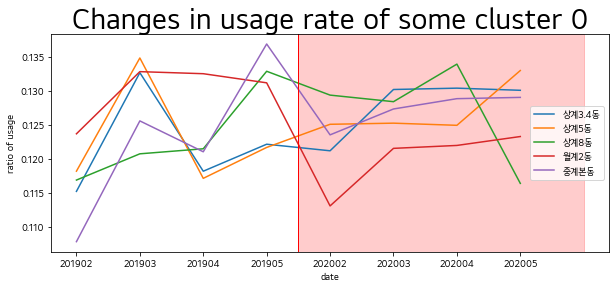

In [94]:
show_cluster_dist(0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.arr

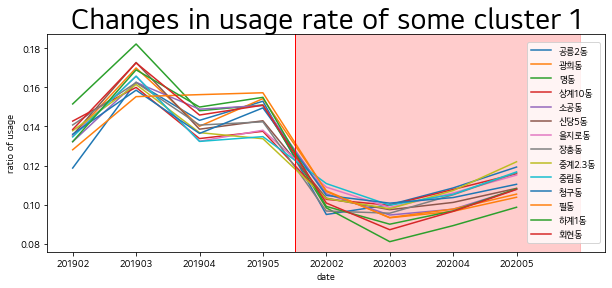

In [95]:
show_cluster_dist(1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.arr

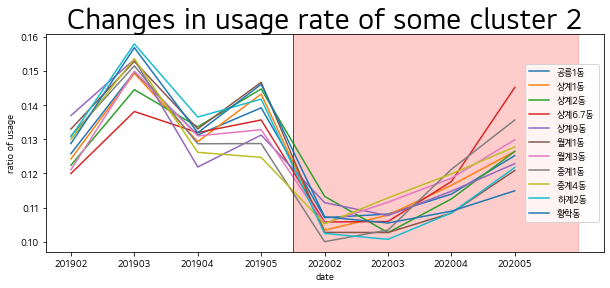

In [96]:
show_cluster_dist(2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.arr

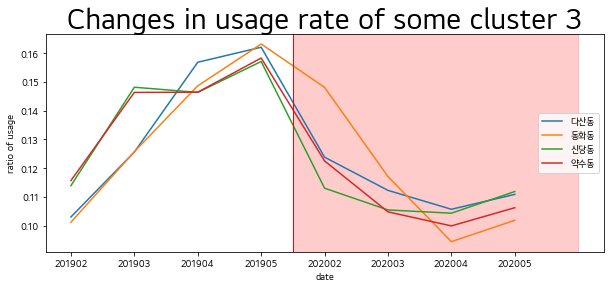

In [97]:
show_cluster_dist(3)

In [98]:
#대구 데이터
import pymysql
conn = pymysql.connect(host='127.0.0.1', port=3306, user='root', password='10042356', use_unicode=True, db="bigcontest", 
                       charset='utf8', autocommit=True, cursorclass=pymysql.cursors.DictCursor)
cursor = conn.cursor()
cursor.execute("""
select 
    c.STD_YM,
    c.HDONG_CD,
    c.HDONG_NM,
    SUM(c.DFLOW) as MONTH_FLOW
from
    (select
        STD_YM,
        STD_YMD,
        HDONG_CD,
        HDONG_NM,
        (TMST_00 + TMST_01 + TMST_02 + TMST_03 + TMST_04 + TMST_05 + TMST_06 + TMST_07 + TMST_08 + TMST_09 + TMST_10 + TMST_11 + 
        TMST_12 + TMST_13 + TMST_14 + TMST_15 + TMST_16 + TMST_17 + TMST_18 + TMST_19 + TMST_20 + TMST_21 + TMST_22 + TMST_23) as DFLOW
    from
        flowtime
    where
        HDONG_CD LIKE '27%') c
group by
    c.STD_YM,
    c.HDONG_NM
""")
flowdata_d = cursor.fetchall()

In [99]:
import pandas as pd
flowdata_d = pd.DataFrame(flowdata_d)

In [100]:
daegu = flowdata_d.pivot("HDONG_NM", "STD_YM", "MONTH_FLOW")
daegu

STD_YM,201902,201903,201904,201905,202002,202003,202004,202005
HDONG_NM,,,,,,,,
고산1동,3369082.73,3898328.44,3435011.68,4311271.20,3391878.42,3156993.11,3423104.33,3751565.00
고산2동,6727213.92,7552408.63,6877639.18,7644652.48,5918714.50,5598872.83,5572567.03,6710952.94
고산3동,1436493.09,1676490.46,1460166.24,1550664.93,1387040.01,1345197.36,1384870.64,1551866.75
남산1동,1358910.09,1404940.41,1409890.86,1491037.89,1058061.89,822734.73,990898.40,1104850.93
남산2동,1602781.24,1728288.05,1663165.49,1762610.77,1183303.48,824622.00,1031299.40,1249333.51
남산3동,358738.10,357433.91,372664.26,374498.88,266006.76,242567.30,315148.11,364336.75
남산4동,815697.14,832330.80,846665.17,834919.74,759251.63,693664.95,777858.53,891906.93
대봉1동,1863975.13,1925985.58,2196006.92,2290630.00,1631720.71,1701974.41,2076788.69,2392535.37
대봉2동,221474.09,230118.05,230955.30,250428.00,203134.31,187121.91,225080.48,253397.44


In [101]:
df_npy1 = list(np.array(daegu.index.tolist()))
df_npy2 = list(np.array(daegu).tolist()) # spark dataframe을 numpy로 변환합니다.

df_npy = [[x,y] for x, y in zip(df_npy1, df_npy2)]
#print(df_npy)

name_npy = np.array(df_npy1)   #행정동의 이름을 저장하는 데이터 변수입니다.
feature_npy = np.array(df_npy2) #행정동의 시계열 데이터를 저장하는 데이터 변수입니다.

def normalization_axis(feature): #시계열 데이터의 효율적인 클러스터링을 위해 normalization을 진행합니다.
    sum_npy = np.array([x/np.sum(x) for x in feature])
    return sum_npy

feature_norm_npy = normalization_axis(feature_npy)
feature_npy = np.array([np.array(x) for x in df_npy2])

In [102]:
route_total = str(feature_norm_npy[~np.isnan(feature_norm_npy).any(axis=1)].shape[0])
print("대구시 행정동 수 : "+str(feature_norm_npy.shape[0]))
print("결측값을 제거한 서울시 행정동수 : "+route_total)
feature_norm = feature_norm_npy[~np.isnan(feature_norm_npy).any(axis=1)]
feature = feature_npy[~np.isnan(feature_norm_npy).any(axis=1)]
name = name_npy[~np.isnan(feature_norm_npy).any(axis=1)]

대구시 행정동 수 : 35
결측값을 제거한 서울시 행정동수 : 35


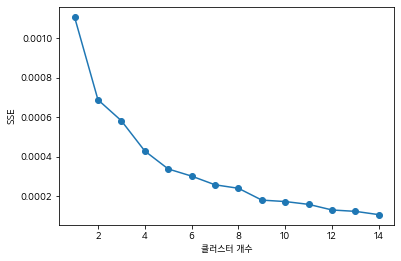

In [103]:
sse = []
for i in range(1,15):
    km = TimeSeriesKMeans(n_clusters=i, metric='euclidean', max_iter=150, random_state=144).fit(feature_norm)
    sse.append(km.inertia_)

plt.plot(range(1,15), sse, marker='o')
plt.xlabel('클러스터 개수')
plt.ylabel('SSE')
plt.show()

In [104]:
n_cluster = 5  #튜닝 작업을 거치며 5개로 결정했습니다.
km = TimeSeriesKMeans(n_clusters=n_cluster, metric="euclidean", max_iter=150).fit(feature_norm) 
# normalization 시계열 데이터를 활용해 euclidean 기반 클러스터링을 진행합니다.
rlt_tsm = km.predict(feature_norm)

C:\ProgramData\Anaconda3\lib\site-packages\tslearn\utils.py:91: UserWarning: 2-Dimensional data passed. Assuming these are 35 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))


In [105]:
# 클러스터별 분포도를 시각화하기 위해 전처리 작업입니다.
labels = []
sizes = []
for i in range(n_cluster):
    labels.append("cluster_"+str(i))
    sizes.append(collections.Counter(rlt_tsm)[i])

Text(0.5, 1.2, 'Cluster Distribution (number of route:35)')

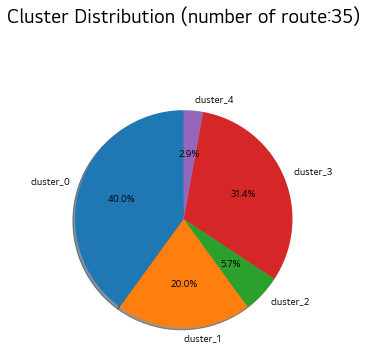

In [106]:
plt.figure(figsize=(10,5))
plt.pie(sizes,labels=labels,shadow=True,startangle=90,autopct='%1.1f%%')
plt.title("Cluster Distribution (number of route:"+route_total+")",position=(0.5,1.2),fontsize=20)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """


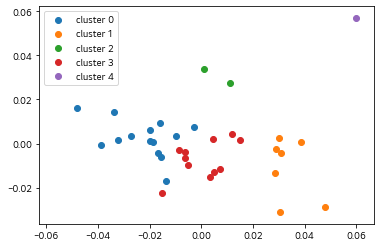

In [107]:
pca = PCA(n_components=2)  # pca를 진행해 클러스터가 얼마나 잘됐는지 검토합니다.
rlt_pca = pca.fit_transform(feature_norm_npy[~np.isnan(feature_norm_npy).any(axis=1)])
for i in range(n_cluster):
    label_name = "cluster " +str(i)
    plt.scatter(rlt_pca[[rlt_tsm==i]][:,0],rlt_pca[[rlt_tsm==i]][:,1],label=label_name)
plt.legend()

In [113]:
rlt_pca_df = pd.DataFrame(data=rlt_pca)
rlt_pca_df['name'] = name
rlt_pca_df['cluster'] = rlt_tsm

In [114]:
def show_cluster_dist(num_cluster,num_sample=50):
    from matplotlib import font_manager,rc
    font_path = "c:/Windows/Fonts/LG_Smart_UI-Regular.TTF"
    font_name = font_manager.FontProperties(fname=font_path).get_name() #한글 출력을 위해 셋팅
    rc('font',family=font_name)
    plt.figure(figsize=(10,4))
    size = sizes[num_cluster]
    if(size>num_sample):
        size = num_sample
    for i in range(size):
        name = "cluster" + str(i) 
        plt.plot(['201902','201903','201904','201905','202002','202003','202004','202005'],feature_norm[[rlt_tsm==num_cluster]][i])
    plt.axvline(3.5,color='red',label='COIVD-19 era',linewidth=1)
    plt.axvspan(3.5, 8, color='red', alpha=0.2)  
    plt.xlabel("date")
    plt.ylabel("ratio of usage")
    plt.title("Changes in usage rate of some cluster "+str(num_cluster),fontsize=30)
    plt.legend(rlt_pca_df[rlt_pca_df['cluster']==num_cluster]['name'], loc='right')
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.arr

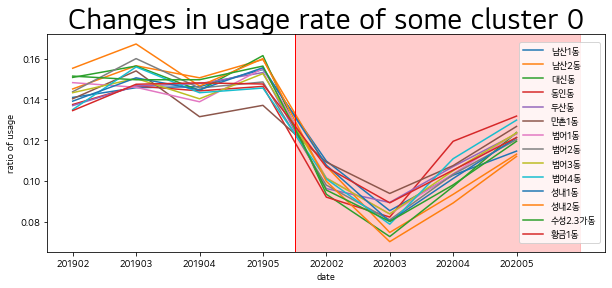

In [115]:
show_cluster_dist(0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.arr

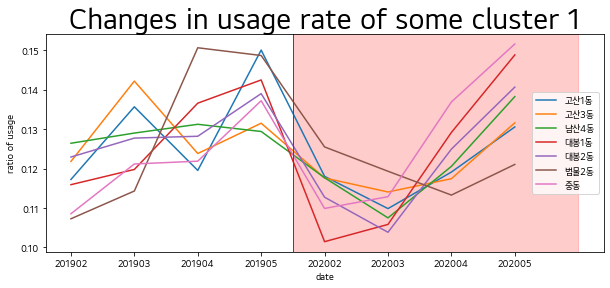

In [116]:
show_cluster_dist(1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if sys.path[0] == '':


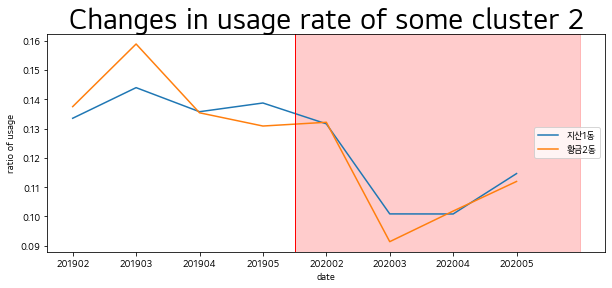

In [117]:
show_cluster_dist(2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.arr

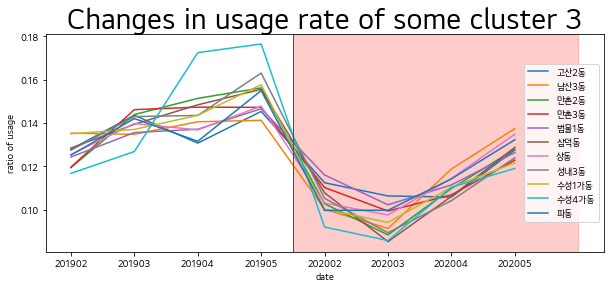

In [118]:
show_cluster_dist(3)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if sys.path[0] == '':


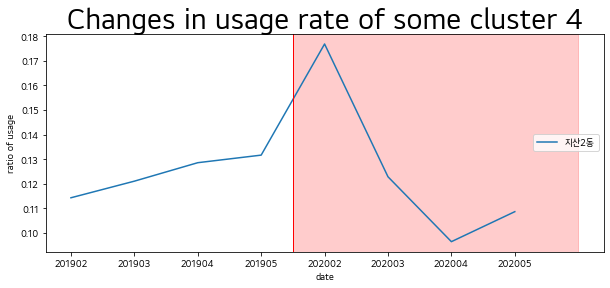

In [119]:
show_cluster_dist(4)